<div dir="rtl">
    علیرضا رضایی
    <br>
    97100762
    <br>
    تمرین سری اول
    <br>
    سوال 2.3
    <br>
</div>

In [1]:
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()

In [2]:
# helper functions --------------------------------

def rotation_matrix_2d(theta):
    '''
        Parameters:
            theta -> radians
            
        Explanation:
            this function rotates points in the xy plane counterclockwise through an angle θ
        
        Usage:
            output is a numpy array matrix so you can use its inner dot method to do matrix product. (look at the next example)
            
            Example:
                v  = np.array([1, 0])
                rv = rotation_matrix(np.pi/2).dot(v)
                
                rv will be np.array([0, 1])
    '''
    
    M = np.array([
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)]
    ])
    
    return M

def transfer_vector(x, y):
    return np.array([[x],
                     [y]])

In [3]:
class Fig:
    def __init__(self, shapes=np.array([[
                                        [0, 0.5      , 1, 0],
                                        [0, sin(pi/3), 0, 0]
                                       ]])):
        '''
            temporary_points variable is used in the class functions to generate next steps points
        '''
        
        self.shapes = shapes
        self.temporary_shapes = shapes
        self.step = 0            
           
            
    def draw(self, points, new_fig=False, color="blue"):
        '''
            points is in the shape np.array([
                                                [x0, x1, x2, x3],
                                                [y0, y1, y2, y3]
                                            ])
            points[0, :] means all points first axes (means Xs)
            points[1, :] means all points second axes (means Ys)
        '''
        
        if new_fig == True:
            new_fig = plt.figure()
            plt.title(f"step {self.step}")
            
        plt.xlim([-0.5, 1.5])
        plt.ylim([-0.5, 1.5])
        
        #we use + 0.3 to shift Ys to display better at the middle of the screen
        plt.plot(points[0, :], points[1, :] + 0.3, color=color)
        plt.fill(points[0, :], points[1, :] + 0.3, color=color)
    
    
    def scale(self, scale_factor):
        '''
            Parameters:
                scale_factor -> float
        '''
        
        return self.shapes * scale_factor
    
    
    def transfer(self, points, t_vector):
        '''
            Parameters:
                t_vector -> a transfer vector that is a np.array in the form [[x],
                                                                              [y]]
            Explanation:
                transfer all points in the direction and with the length of the transfer vector
        '''
        
        return points + t_vector
    
    
    def add_new_shapes_to_temporary_shapes(self, new_points):
        ''' https://numpy.org/doc/stable/reference/generated/numpy.append.html'''
        
        self.temporary_shapes = np.append(self.temporary_shapes, new_points, 0)
       
    
    def f1(self):
        self.shapes = self.scale(1/2)
        self.temporary_shapes = self.shapes
        
    
    def f2(self):
        transfered_shapes = self.shapes + transfer_vector(1/2, 0)
        self.add_new_shapes_to_temporary_shapes(transfered_shapes)
        
    
    def f3(self):
        transfered_shapes = self.shapes + transfer_vector(1/4, sin(pi/3)/2)
        self.add_new_shapes_to_temporary_shapes(transfered_shapes)
        
        
    def generate(self, steps):
        '''
            Parameters:
                steps -> integer
                
            Explanation:
                this function will generate ad draw n steps. (n is the steps parameter of the function)
        '''
        
        for s in range(steps):
            self.step = s
            
            if self.step == 0:
                self.draw(self.shapes[0], new_fig=True)
                pass
        
            else:
                self.f1()
                self.f2()
                self.f3()
                
                self.shapes = self.temporary_shapes
                
                self.draw(np.array([[0], [0]]), new_fig=True)
                for shape in self.shapes:
                    self.draw(shape)

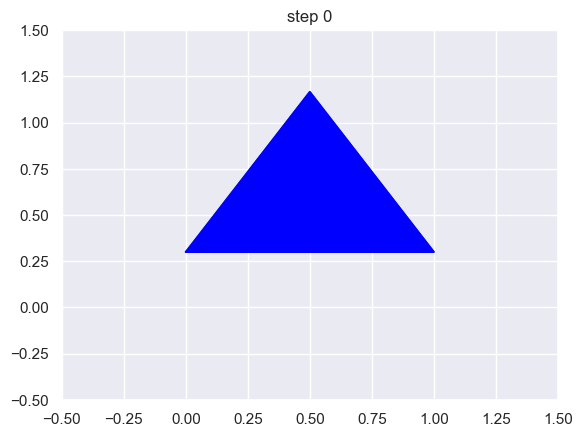

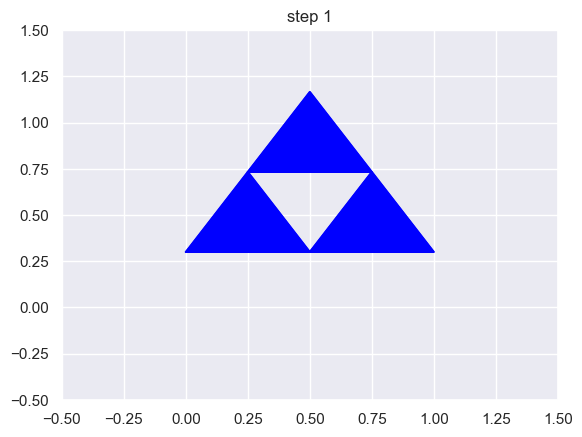

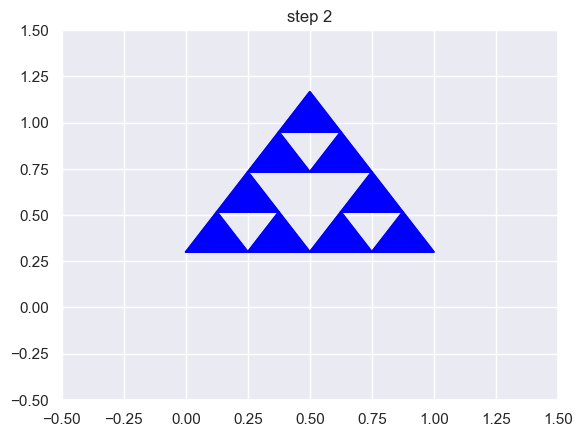

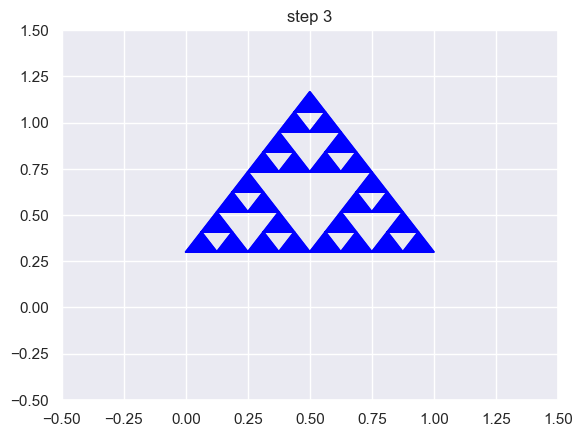

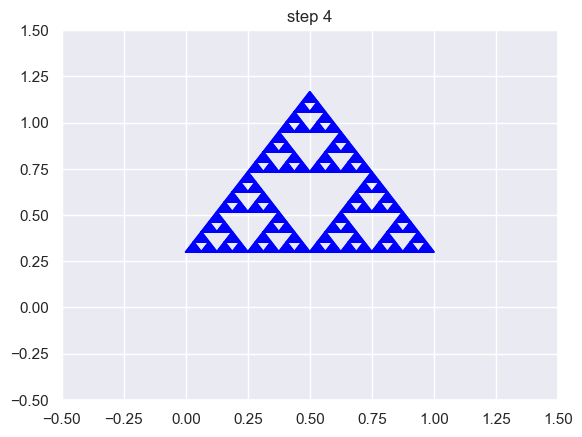

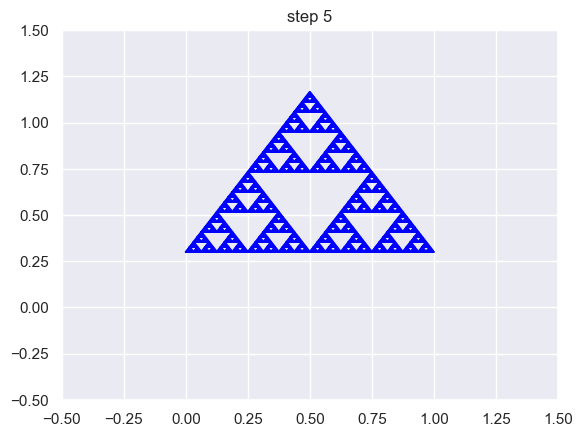

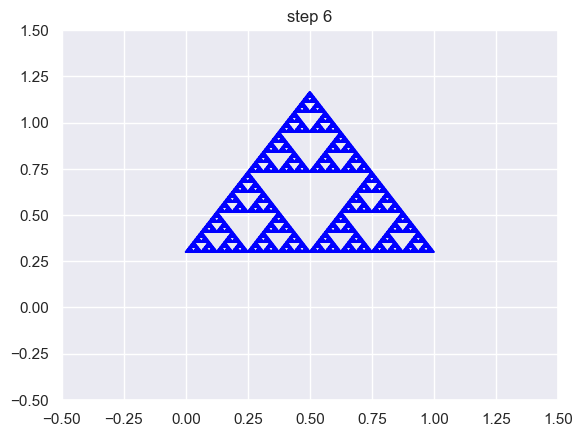

In [4]:
fig = Fig()

fig.generate(7)

In [ ]:
 shapes = np.array([
     [[1, 0], 
      [0, 1]],
     
     [[1, -1], 
      [0, 0]]
 ])

In [ ]:
for shape in shapes:
    print(rotation_matrix_2d(pi/2).dot(shape))

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
[[ 6.123234e-17 -6.123234e-17]
 [ 1.000000e+00 -1.000000e+00]]


In [ ]:
shapes + np.array([[1], 
                   [2]])

array([[[2, 1],
        [2, 3]],

       [[2, 0],
        [2, 2]]])

In [ ]:
shapes + np.array([1, 
                   2])

array([[[2, 2],
        [1, 3]],

       [[2, 1],
        [1, 2]]])